# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 5: Loan Classification
#### Due Wednesday, December 21, 9 am

### Overview

You are going to create a model to predict loan status (good / bad) using data from Lending Club.  Download the 2015 data from [here](https://www.lendingclub.com/info/download-data.action).  

#### Data Manipulation

The data require some cleaning before you can build the model.  Think about what you are trying to predict, and how to re-engineer categories in order to do this.  What are the categories for loan status in the data?<br>
*hint*:  only use loans that have been determined (i.e. not current loans).<br>
*hint*:  re-categorize the loans into "good" and "bad" (only two categories)

Let's use annual income, debt-to-income, interest rate, loan term, funded amount and home ownership to model the loan status.  If you don't know what these features are, have a look at the data dictionary on the Lending Club [page](https://www.lendingclub.com/info/download-data.action).

#### EDA
Before doing any kind of modelling, explore the data.  For example, what is the distribution of good / bad loans?  Are interest rate and DTI related?  Make some pivot tables / plots to better understand the data you have.

#### Model
Create your classification model using the above features!<br>
*hint*: your data must be numerical in order to create your model.  Are all of the data numerical?  What can you do to make them numerical?  (Look-up dummy variables)

Once you have your model, make a prediction based on the first row of data.  What is the probability of loan repayment for this person?  If your boss asked you whether the person is going to repay, what would you say?



**Deliverables**: a Jupyter  notebook including EDA (plotting) and your model.  Or you can work in pycharm, but you must submit EDA as well.  Also you should submit a blog post describing your project.

In [25]:
# Import statements
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
# Reading in dataset
df = pd.read_csv('LoanStats3d.csv', header=1)
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,66310712,71035433.0,35000.0,35000.0,35000.0,60 months,14.85%,829.90,C,C5,...,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0
1,68476807,73366655.0,10400.0,10400.0,10400.0,60 months,22.45%,289.91,F,F1,...,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
2,68341763,72928789.0,20000.0,20000.0,20000.0,60 months,10.78%,432.66,B,B4,...,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0


## Data Manipulation

In [27]:
df = df[['annual_inc','dti','int_rate','term','funded_amnt','home_ownership','loan_status']]
df

,annual_inc,dti,int_rate,term,funded_amnt,home_ownership,loan_status
0,110000.0,17.06,14.85%,60 months,35000.0,MORTGAGE,Current
1,104433.0,25.37,22.45%,60 months,10400.0,MORTGAGE,Fully Paid
2,63000.0,10.78,10.78%,60 months,20000.0,MORTGAGE,Current
3,109000.0,26.02,7.49%,36 months,25000.0,MORTGAGE,Fully Paid
4,92000.0,21.60,6.49%,36 months,28000.0,MORTGAGE,Current
5,112000.0,8.68,11.99%,60 months,18000.0,MORTGAGE,Fully Paid
6,48000.0,33.18,14.85%,60 months,16000.0,MORTGAGE,Current
7,64000.0,18.28,8.49%,60 months,23000.0,RENT,Current
8,55000.0,25.49,19.89%,36 months,8650.0,RENT,Fully Paid
9,60000.0,22.44,7.49%,36 months,9600.0,MORTGAGE,Current


In [28]:
df.dtypes

annual_inc        float64
dti               float64
int_rate           object
term               object
funded_amnt       float64
home_ownership     object
loan_status        object
dtype: object

In [29]:
# Convert interest rate column

    # remove percent sign

    # convert to float and divide by 

def convert_int_rate(x):
    """Converts interest rate from string to float"""
    if '%' in str(x):
        x = str(x).strip('%').replace(" ","")
        return x
    else:
        return x

df['int_rate_converted'] = df['int_rate'].apply(convert_int_rate).astype(float)

df = df.drop("int_rate", axis=1)
df.head()

,annual_inc,dti,term,funded_amnt,home_ownership,loan_status,int_rate_converted
0,110000.0,17.06,60 months,35000.0,MORTGAGE,Current,14.85
1,104433.0,25.37,60 months,10400.0,MORTGAGE,Fully Paid,22.45
2,63000.0,10.78,60 months,20000.0,MORTGAGE,Current,10.78
3,109000.0,26.02,36 months,25000.0,MORTGAGE,Fully Paid,7.49
4,92000.0,21.60,36 months,28000.0,MORTGAGE,Current,6.49


In [30]:
df['loan_status'].value_counts()

Current               303912
Fully Paid             76833
Charged Off            24239
Late (31-120 days)      9990
In Grace Period         4116
Late (16-30 days)       1925
Default                   80
Name: loan_status, dtype: int64

In [31]:
# drop current, late, in grace period
# keep fully paid, default and charged off

df1 = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Default')| (df['loan_status'] == 'Charged Off')]
print(len(df1))
print(len(df))

101152
421097


In [32]:
# Create dummy variables for categorical variables (term and home ownership)
term_dummies = pd.get_dummies(df1['term'])
home_ownership_dummies = pd.get_dummies(df1['home_ownership'])


df1 = pd.concat([df1, term_dummies, home_ownership_dummies], axis = 1)
df1

,annual_inc,dti,term,funded_amnt,home_ownership,loan_status,int_rate_converted,36 months,60 months,MORTGAGE,OWN,RENT
1,104433.0,25.37,60 months,10400.0,MORTGAGE,Fully Paid,22.45,0.0,1.0,1.0,0.0,0.0
3,109000.0,26.02,36 months,25000.0,MORTGAGE,Fully Paid,7.49,1.0,0.0,1.0,0.0,0.0
5,112000.0,8.68,60 months,18000.0,MORTGAGE,Fully Paid,11.99,0.0,1.0,1.0,0.0,0.0
8,55000.0,25.49,36 months,8650.0,RENT,Fully Paid,19.89,1.0,0.0,0.0,0.0,1.0
18,180000.0,14.67,36 months,20000.0,MORTGAGE,Fully Paid,9.17,1.0,0.0,1.0,0.0,0.0
20,65000.0,16.06,36 months,24700.0,MORTGAGE,Fully Paid,11.99,1.0,0.0,1.0,0.0,0.0
27,88000.0,26.59,36 months,17600.0,MORTGAGE,Fully Paid,5.32,1.0,0.0,1.0,0.0,0.0
29,109000.0,23.35,60 months,16000.0,MORTGAGE,Fully Paid,17.97,0.0,1.0,1.0,0.0,0.0
33,75000.0,20.84,60 months,24250.0,MORTGAGE,Default,24.24,0.0,1.0,1.0,0.0,0.0
37,195000.0,6.79,60 months,27500.0,MORTGAGE,Fully Paid,14.85,0.0,1.0,1.0,0.0,0.0


In [33]:
# Create target outcome column

def good_or_bad_loans (x):
    """Creates target outcome column for good and bad loans"""
    if x == 'Fully Paid' or x == 'In Grace Period':
       return 1
    else:
       return 0

df1['good_or_bad'] = df1['loan_status'].apply(good_or_bad_loans)
df1.head()

,annual_inc,dti,term,funded_amnt,home_ownership,loan_status,int_rate_converted,36 months,60 months,MORTGAGE,OWN,RENT,good_or_bad
1,104433.0,25.37,60 months,10400.0,MORTGAGE,Fully Paid,22.45,0.0,1.0,1.0,0.0,0.0,1
3,109000.0,26.02,36 months,25000.0,MORTGAGE,Fully Paid,7.49,1.0,0.0,1.0,0.0,0.0,1
5,112000.0,8.68,60 months,18000.0,MORTGAGE,Fully Paid,11.99,0.0,1.0,1.0,0.0,0.0,1
8,55000.0,25.49,36 months,8650.0,RENT,Fully Paid,19.89,1.0,0.0,0.0,0.0,1.0,1
18,180000.0,14.67,36 months,20000.0,MORTGAGE,Fully Paid,9.17,1.0,0.0,1.0,0.0,0.0,1


## Exploratory Data Analysis (EDA)
Before doing any kind of modelling, explore the data.  
For example 
* what is the distribution of good / bad loans?  Are interest rate and DTI related?  
* make some pivot tables / plots to better understand the data you have.

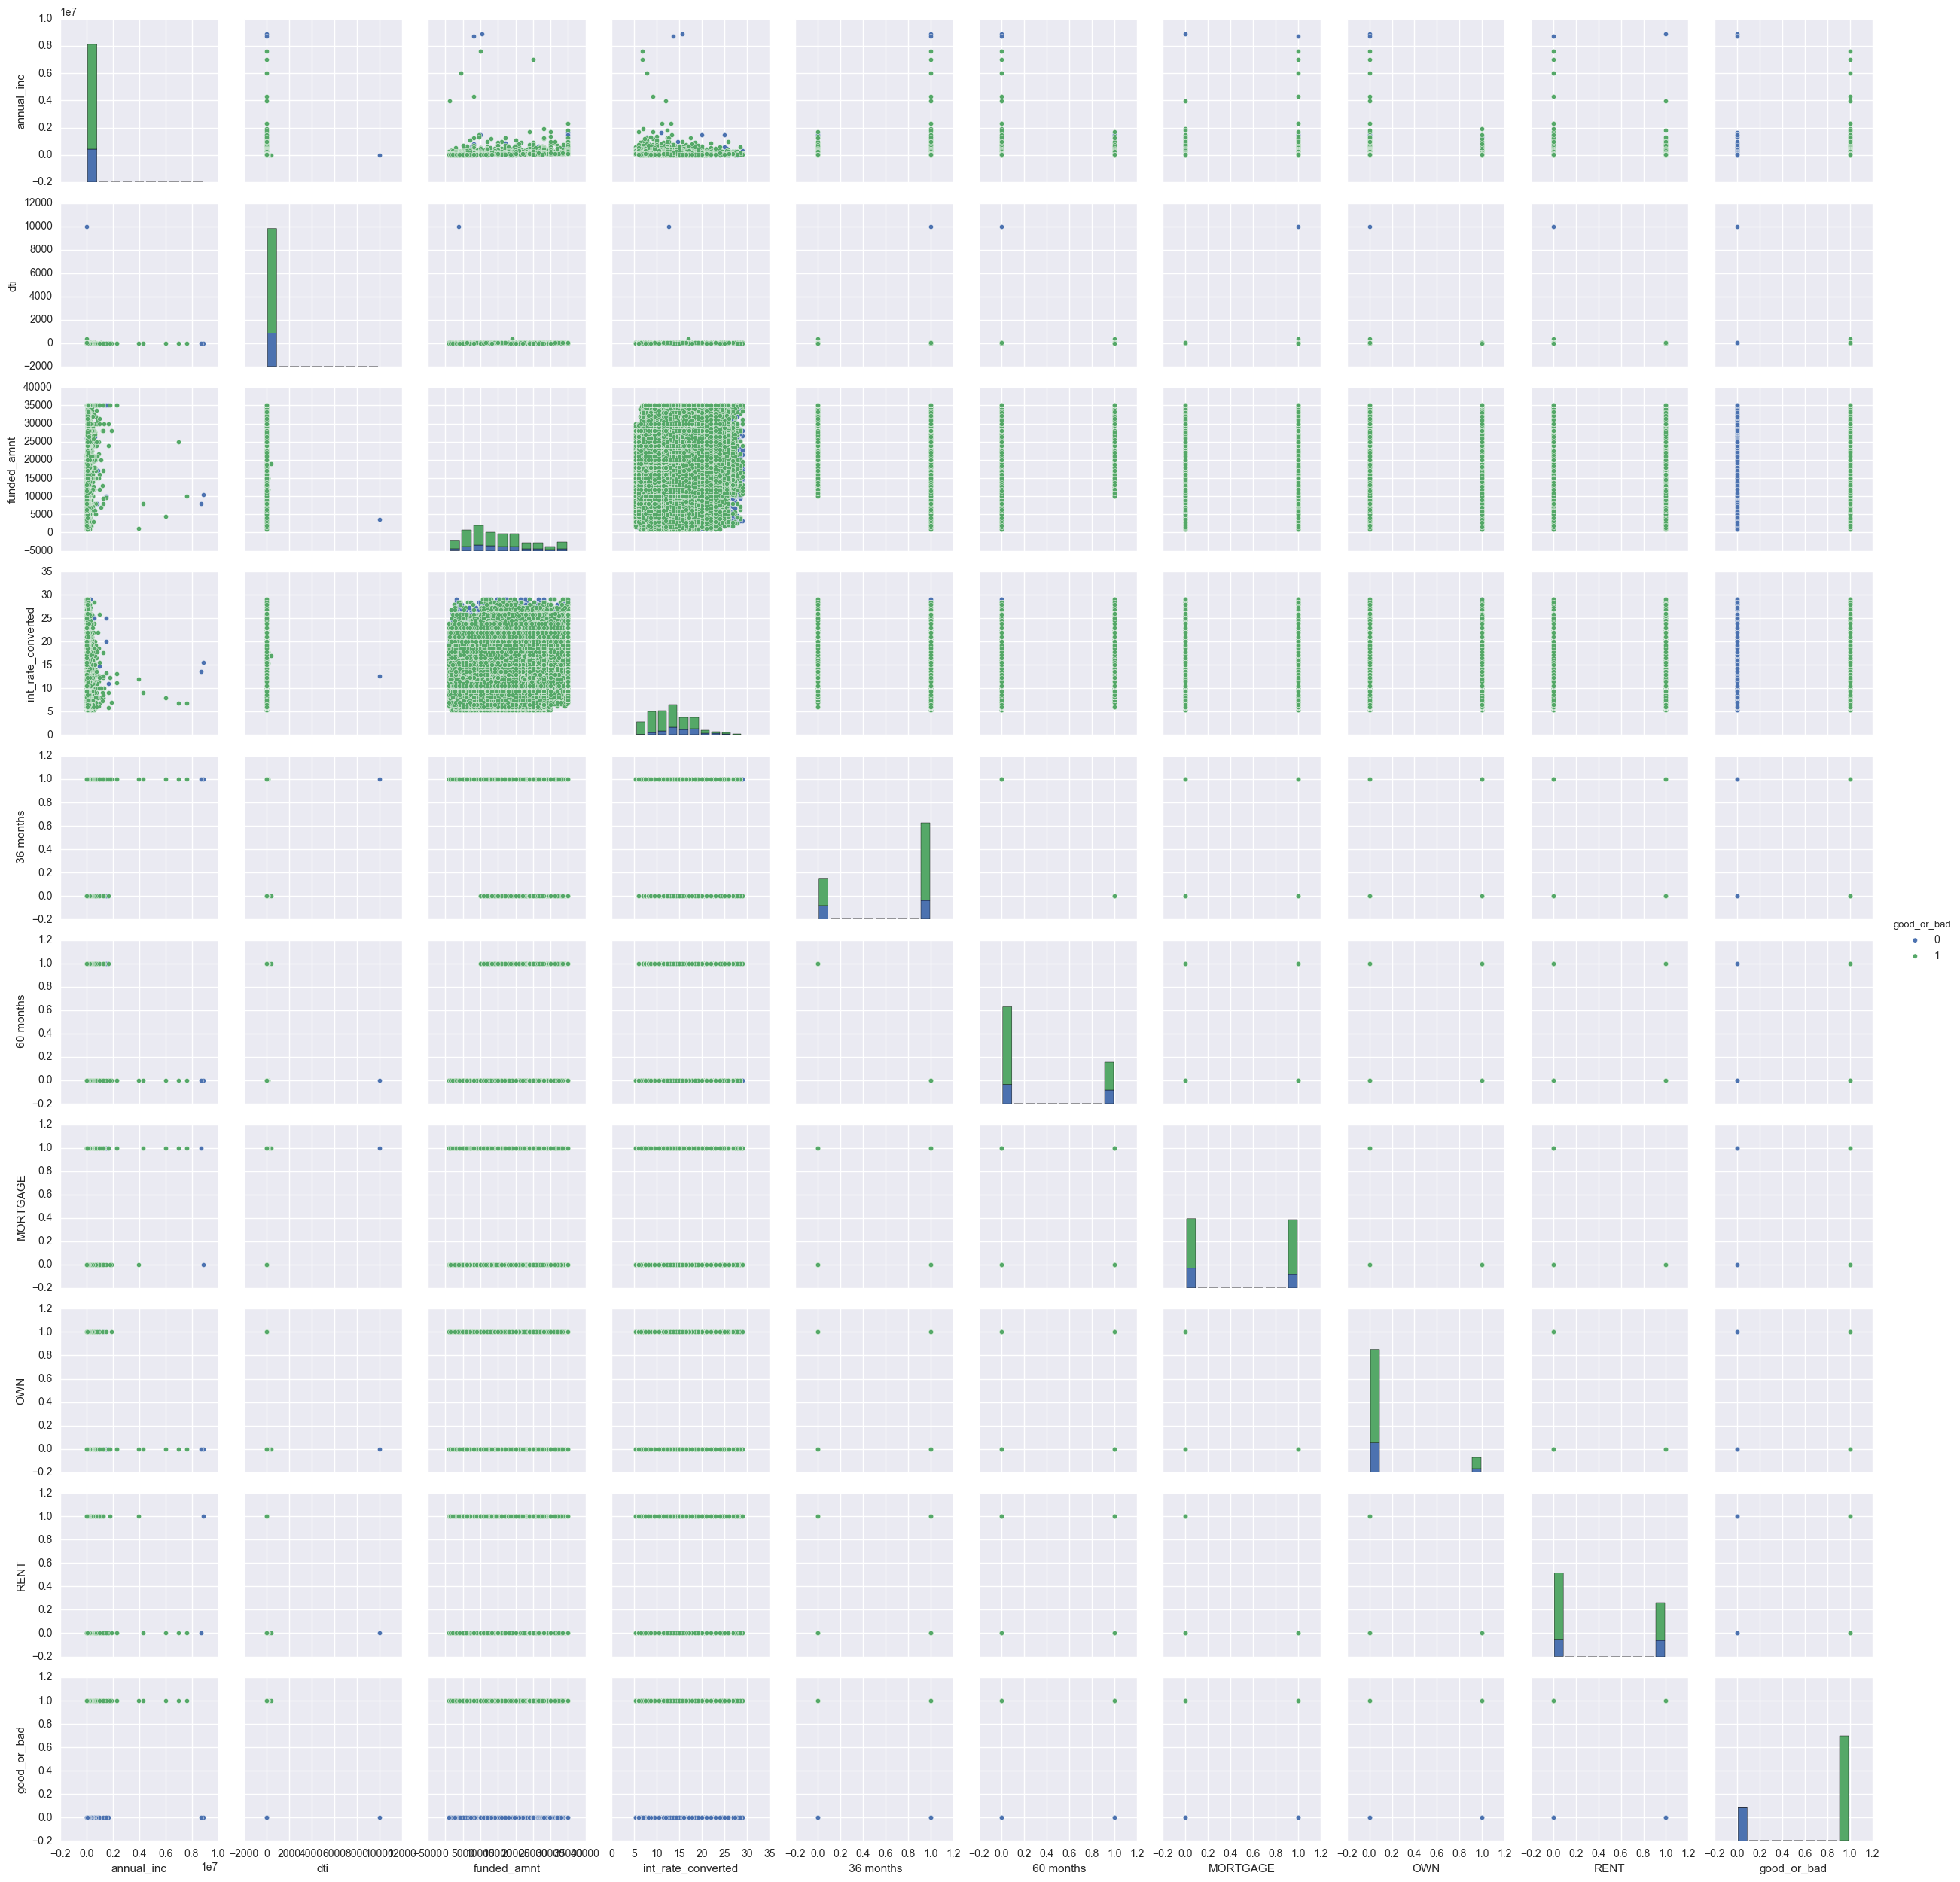

In [34]:
# Scatter Matrix
sns.pairplot(df1, hue='good_or_bad')

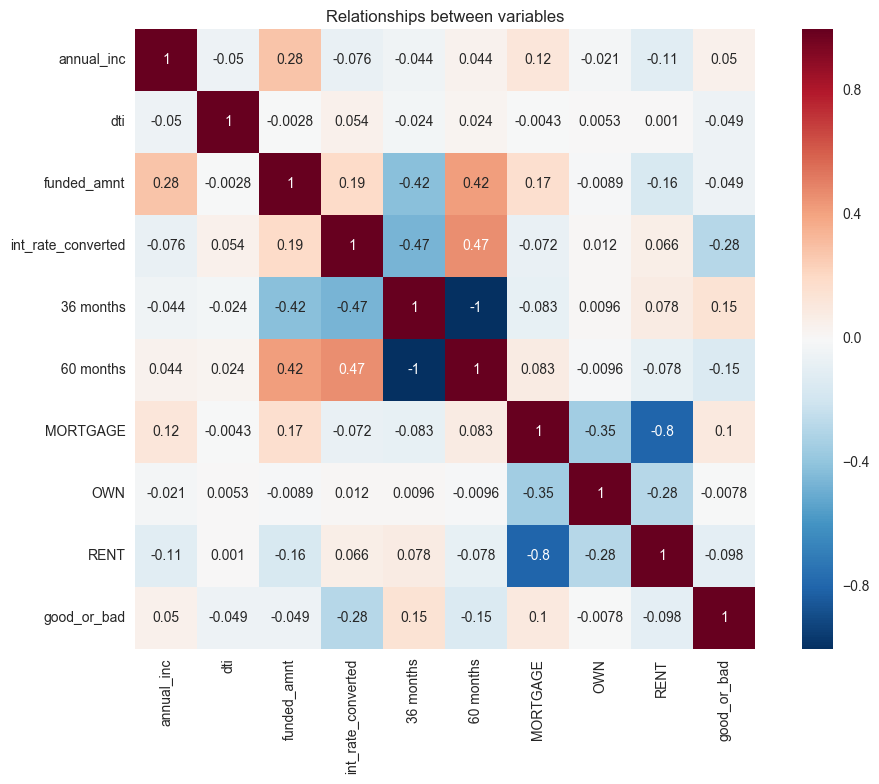

In [35]:
correlation = df1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, vmax=1, square=True, annot=True)
plt.title("Relationships between variables")
plt.show()

#### Model
Create your classification model using the above features!<br>
*hint*: your data must be numerical in order to create your model.  Are all of the data numerical?  What can you do to make them numerical?  (Look-up dummy variables)

Once you have your model, make a prediction based on the first row of data.  What is the probability of loan repayment for this person?  If your boss asked you whether the person is going to repay, what would you say?

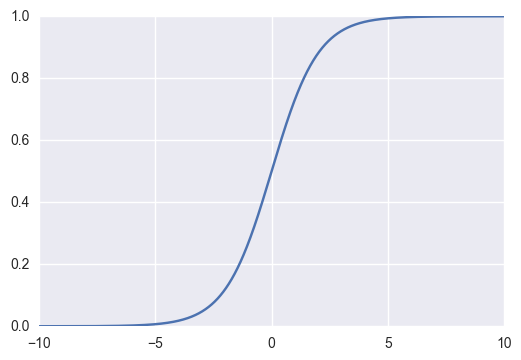

In [36]:
# Source: 631 - Classification 1
sigmoid = np.vectorize(lambda x: 1./(1+np.exp(-x)))
X = np.arange(-10,10,0.01)
plt.plot(X,sigmoid(X))

In [38]:
# Need to normalize numerical data columns

min_val = df['annual_inc'].min()
max_val = df['annual_inc'].max()

def min_max(x):
   return (x-min_val)/(max_val-min_val)

# normalizes
df1['annual_inc'].apply(min_max)

1         0.010993
3         0.011474
5         0.011789
8         0.005789
18        0.018947
20        0.006842
27        0.009263
29        0.011474
33        0.007895
37        0.020526
59        0.005263
81        0.008947
83        0.011579
86        0.003158
88        0.014211
90        0.005658
94        0.011579
104       0.010947
114       0.009684
117       0.006316
119       0.007718
124       0.012632
125       0.006189
133       0.005263
135       0.002947
141       0.007158
150       0.006632
152       0.001579
158       0.007895
160       0.008632
            ...   
421004    0.012632
421017    0.003684
421019    0.010947
421020    0.004421
421022    0.005030
421024    0.004421
421033    0.003684
421035    0.003368
421043    0.011368
421048    0.007895
421049    0.007263
421053    0.005158
421054    0.021053
421055    0.012632
421059    0.012632
421060    0.004421
421063    0.006640
421068    0.005053
421071    0.005474
421076    0.005789
421079    0.004211
421081    0.

In [ ]:
# Normalize int_rate_converted
min_val = df['int_rate_converted'].min()
max_val = df['int_rate_converted'].max()

df1['int_rate_converted'].apply(min_max)

In [ ]:
# Normalize dti
min_val = df['dti'].min()
max_val = df['dti'].max()

df1['dti'].apply(min_max)

In [ ]:
# Normalize funded amnt
min_val = df['funded_amnt'].min()
max_val = df['funded_amnt'].max()

df1['dti'].apply(min_max)

In [ ]:
df1['dti'].apply(min_max)
df1['funded_amnt']

In [ ]:
# Import statements
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import patsy
import re

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

%matplotlib inline

In [ ]:
# dummy variable trap